# Wstęp do OpenCV

OpenCV jest wieloplatformową, otwartoźródłową biblioteką, służącą przede wszystkim do obróbki i przetwarzania obrazu w czasie rzeczywistym. Została ona stworzona w języku C, istnieją jednak bindingi do niej w różnych innych językach programowania, takich jak C++, C#, Java, JavaScript czy też Python.

OpenCV w projektach deep-learningowych nie jest używane do uczenia sieci neuronowych - uczenie powinno się realizować wykorzystując frameworki takie jak TensorFlow czy PyTorch, a następnie zapisany model wykorzystać w OpenCV. OpenCV używane jest do przygotowania i preprocessingu obrazów, które następnie przekazuje się do wytrenowanego modelu, po czym wykonuje kolejne operacje na wynikach. OpenCV można również użyć do łączenia sieci neuronowych z innymi algorytmami przetwarzającymi obraz dostępnymi w bibliotece.

## Rozpoznawanie twarzy korzystając z gotowych modeli

Do rozpoznawania twarzy oraz oczu możemy wykorzystać gotowe modele zawarte w OpenCV. Wykorzystamy gotowe klasyfikatory [Haara](http://www.willberger.org/cascade-haar-explained/) zawarte w `opencv/data/haarcascades`:

In [123]:
import cv2 # importowanie OpenCV

Na początku stworzymy metodę `detectAndDisplay`, która będzie wołana dla każdej klatki wideo, będzie wykonywała preprocessing na obrazie a następnie uruchamiała klasyfikatory do wykrycia twarzy i oczu. Preprocessing będzie polegał na przekonwertowaniu obrazu na skalę szarości, ponieważ na takich obrazach uczony był klasyfikator, a następnie na wyrównaniu histogramu obrazu, o którym można przeczytać w [dokumentacji OpenCV](https://docs.opencv.org/4.3.0/d4/d1b/tutorial_histogram_equalization.html)

In [5]:
def detectAndDisplay(frame):
    frame_gray = cv2.cvtColor(frame, cv.COLOR_BGR2GRAY) # Zamień klatkę z kolorowej na skalę szarości
    frame_gray = cv2.equalizeHist(frame_gray) # Wyrównaj histogram
    
    
    faces = face_cascade.detectMultiScale(frame_gray) # Wykryj twarze 
    for (x, y, w, h) in faces:
        center = (x + w // 2, y + h // 2)
        frame = cv2.ellipse(frame, center, (w // 2, h // 2), 0, 0, 360, (255, 0, 255), 4)
        faceROI = frame_gray[y:y + h, x:x + w]
        
        eyes = eyes_cascade.detectMultiScale(faceROI) # W każdej twarzy wykryj oczy
        for (x2, y2, w2, h2) in eyes:
            eye_center = (x + x2 + w2 // 2, y + y2 + h2 // 2)
            radius = int(round((w2 + h2) * 0.25))
            frame = cv2.circle(frame, eye_center, radius, (255, 0, 0), 4)
    cv2.imshow('Face and eyes detection', frame)

Następnie zaimportujemy wyuczone już modele z biblioteki OpenCV oraz uruchomimy stream wideo na domyślnej kamerze (możemy zamiast indeksu urządzenia podać ścieżkę do zapisanego pliku wideo)

In [6]:
face_cascade_name = 'haarcascades/haarcascade_frontalface_alt.xml'
eyes_cascade_name = 'haarcascades/haarcascade_eye_tree_eyeglasses.xml'
face_cascade = cv2.CascadeClassifier()
eyes_cascade = cv2.CascadeClassifier()

# Ładowanie kaskad  
if not face_cascade.load(cv2.samples.findFile(face_cascade_name)):
    print('Error loading face cascade!')
    exit(0)
if not eyes_cascade.load(cv2.samples.findFile(eyes_cascade_name)):
    print('Error loading eyes cascade!')
    exit(0)

# 2. Odczytaj stream wideo 
cap = cv2.VideoCapture(0)
if not cap.isOpened:
    print('Error opening video capture'!)
    exit(0)
while True:
    ret, frame = cap.read()
    if frame is None:
        print('No captured frame!')
        break
    detectAndDisplay(frame)
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

## Preprocessing obrazów

Preprocessing obrazów jest ważnym elementem wykonywanym przed przekazaniem obrazu do modelu ML. Powinniśmy starać się dopasować obrazy wejściowe do obrazów na których uczony był model. Potrzebne kroki obróbki obrazu zależą od metody ekstrakcji cech i typu obrazu wejściowego. Poniżej zaprezentujemy kilka popularnych metod.



Denoising: applying a Gaussian or simple box filter for denoising.

Contrast Enhancement: If gray level image is too dark or too bright, this may be applied.

Downsampling to increase speed.

Morphological operations for binary images.

In [91]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

### Odszumianie

Odszumianie obrazu najczęściej realizowane jest poprzez użycie rozmycia Gaussowskiego lub [box filtering](https://en.wikipedia.org/wiki/Box_blur)

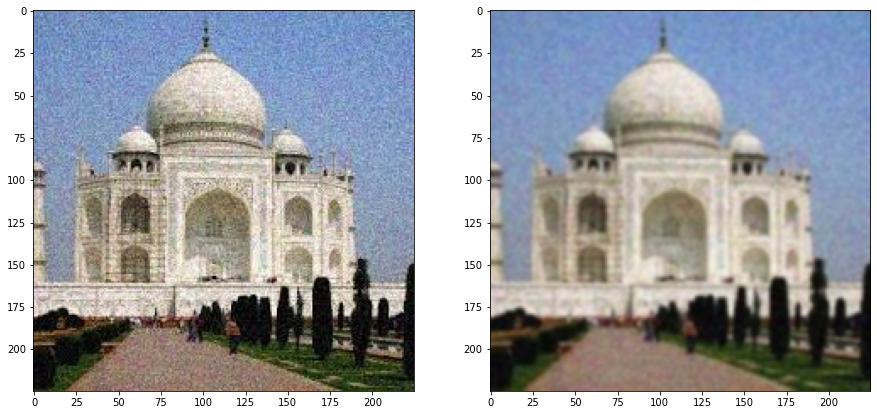

In [31]:
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))

img = cv2.imread('noise.jpg') 
# OpenCV używa schematu BGR a matplotlib RGB, musimy więc przekonwertować obraz przed wyświetleniem
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
img_blurred = # TODO wykonaj rozmycie Gaussowskie cv2.GaussianBlur(img, (5,5), 0)
ax2.imshow(cv2.cvtColor(img_blurred, cv2.COLOR_BGR2RGB))

### Poprawa kontrastu
Jeśli sygnał opisujący obraz w skali szarości jest reprezentowany przez wartości z niewielkiego zakresu, możemy poprawić kontrast poprzez [wyrównanie histogramu](https://docs.opencv.org/4.3.0/d4/d1b/tutorial_histogram_equalization.html)

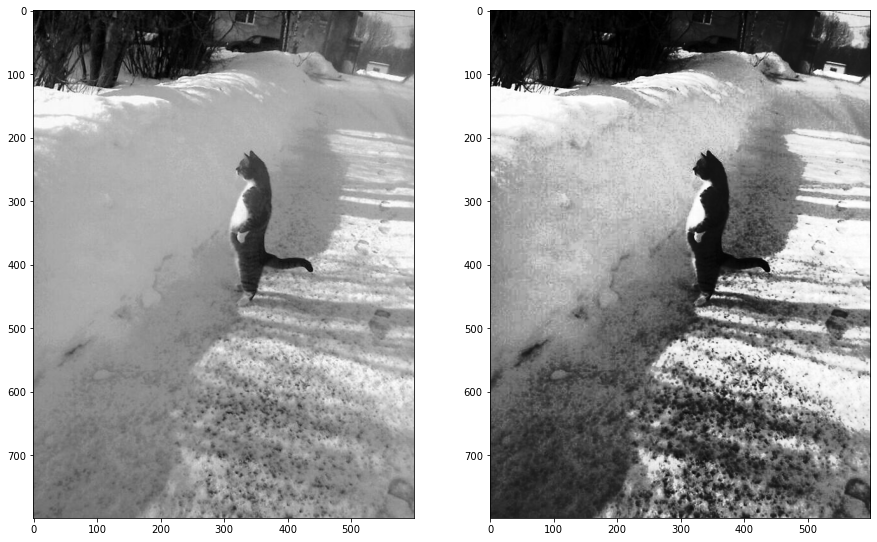

In [29]:
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))

img = cv2.imread('cat_gray.jpg', cv2.IMREAD_GRAYSCALE) 
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_GRAY2RGB))
img_equalized = #TODO cv2.equalizeHist(img)
ax2.imshow(cv2.cvtColor(img_equalized, cv2.COLOR_GRAY2RGB))

### Zmniejszenie obrazu (downsampling)
Często w celu przyspieszenia przetwarzania lub dopasowania rozmiaru wejścia do rozmiaru, który posiadały dane uczące model, wykorzystuje się downsampling  

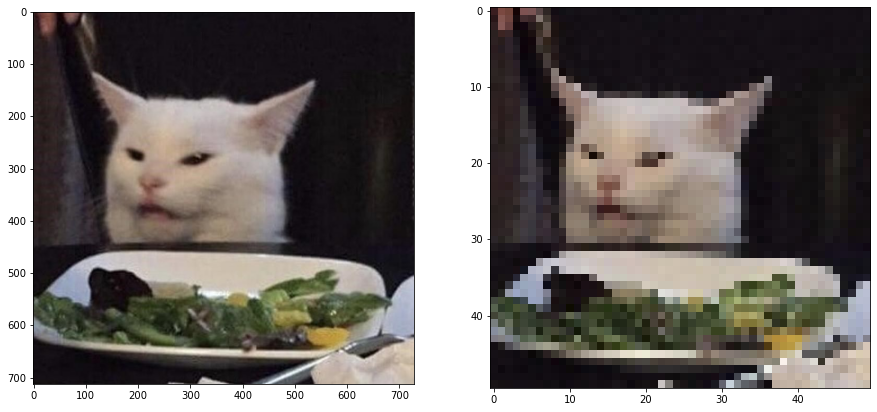

In [37]:
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))

img = cv2.imread('smudge.jpg') 
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
img_resized =  # TODO zmniejsz obraz do rozmiaru 50 x 50 px cv2.resize(img, (50, 50))
ax2.imshow(cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB))

### Wykrywanie krawędzi
Wykrywanie krawędzi używane jest do segmentacji obrazu oraz do ekstrakcji cech w modelach ML. Jednym z popularnych algorytmów wykrywania krawędzi jest algorytm [Canny](https://en.wikipedia.org/wiki/Canny_edge_detector)



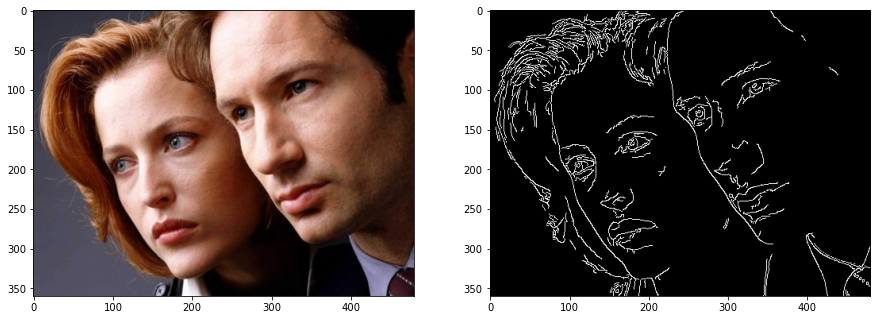

In [87]:
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))

img = cv2.imread('xfiles.jpg') 
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
img_edges = # TODO użyj algorytmu Canny do wykrycia krawędzi. Poeksperymentuj z różnymi wartościami thresholdu cv2.Canny(img, 100, 220)
ax2.imshow(img_edges, cmap="gray")

## Przekształcenia perspektywy
Przekształcenia perspektywy ([homografia](https://en.wikipedia.org/wiki/Homography_\(computer_vision\))) używa się do generacji sztucznych obrazów do uczenia modeli, poprawienia znieszktałconych obrazów a także do wklejania modeli obiektów 3D do obrazów lub filmów tak, by wyglądały jak oryginalna część obrazu ([Rozszerzona rzeczywistość](https://pl.wikipedia.org/wiki/Rzeczywisto%C5%9B%C4%87_rozszerzona)) 

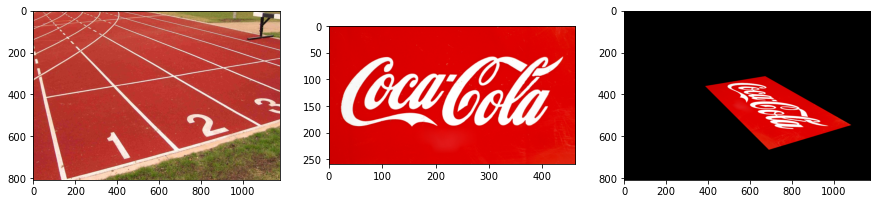

In [105]:
_, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 15))

img_track = cv2.imread('track.jpg')
img_logo = cv2.imread('logo.jpg')
rows_t, cols_t, ch_t = img_track.shape
rows_l, cols_l, ch_l = img_logo.shape

pts_l = np.float32([(0,0), (cols_l-1, 0), (cols_l-1, rows_l-1), (0, rows_l-1)]) # Punkty na rogach logo 
pts_t = np.float32([(671, 314), (1080, 546), (689, 663), (386, 361)]) # Punkty na obrazie ścieżki do wklejenia logo 

M = cv2.getPerspectiveTransform(pts_l, pts_t)

img_with_logo = np.copy(img_track)
# TODO wklej logo na obraz bieżni cv2.warpPerspective(img_logo, M, (cols_t, rows_t), img_with_logo, borderMode=cv2.BORDER_TRANSPARENT)
# hint: użyj cv2.BORDER_TRANSPARENT żeby uniknąć nadpisania całego obrazu 

ax1.imshow(cv2.cvtColor(img_track, cv2.COLOR_BGR2RGB))
ax2.imshow(cv2.cvtColor(img_logo, cv2.COLOR_BGR2RGB))
ax3.imshow(cv2.cvtColor(img_with_logo, cv2.COLOR_BGR2RGB))

### Transformacje morfologiczne
[Transformacje morfologiczne](https://docs.opencv.org/4.3.0/d9/d61/tutorial_py_morphological_ops.html) są prostymi przekształceniami bazującymi na kształcie obrazu. Najczęściej wykonuje się je na obrazach binarnych. Oprócz obrazu do przekształcenia potrzebują jądra transformacji. Dwoma podstawymi przekształceniami morfologicznymi są erozja i dylatacja. Następnie tworzy się z nich domknięcie, otwarcie oraz gradient morfologiczny

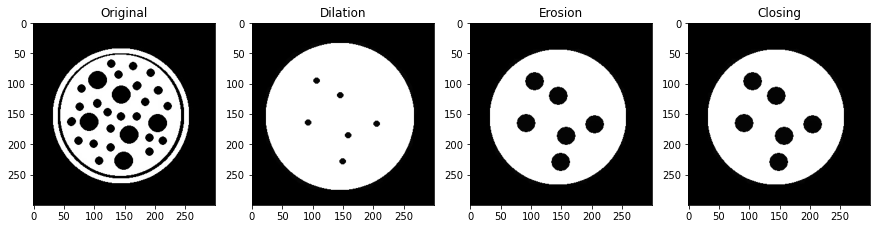

In [167]:
_, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(15, 15))

img = cv2.imread('circle.jpg')
a, b = 10, 11
n = 22; r = 10
y,x = np.ogrid[-a:n-a, -b:n-b]
mask = x*x + y*y <= r*r
kernel = np.zeros((n, n), np.uint8)
kernel[mask] = 1 # Nasz obraz posiada okrągłe "otwory", najlepiej więc będzie użyć okrągłego jądra transformacji

dilation = # TODO dokonaj dylatacji obrazu cv2.dilate(img, kernel, iterations = 1)
erosion = # TODO dokonaj erozji obrazu cv2.erode(dilation, kernel, iterations = 1)
closing = # TODO dokonaj domknięcia morfologicznego obrazu cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

# Domknięcie morfologiczne jest następującymi po sobie operacjami dylatacji i erozji 
ax1.set_title("Original")
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax2.set_title("Dilation")
ax2.imshow(cv2.cvtColor(dilation, cv2.COLOR_BGR2RGB))
ax3.set_title("Erosion")
ax3.imshow(cv2.cvtColor(erosion, cv2.COLOR_BGR2RGB))
ax4.set_title("Closing")
ax4.imshow(cv2.cvtColor(closing, cv2.COLOR_BGR2RGB))